In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Diabetes dataset

In [21]:
from sklearn.datasets import load_diabetes

In [22]:
df = pd.DataFrame(data= load_diabetes().data,columns=load_diabetes().feature_names)

In [23]:
df['target'] = load_diabetes().target

In [24]:
X = df.drop(columns='target')
y = df['target']

In [25]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [26]:
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


## Train Test Split2

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

## Fitting Linear Regression sklearn --> OLS Method

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

print('Coeffecients: ',lr.coef_)
print('Intercept: ',lr.intercept_)

y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

print('RMSE: ',np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print('R2 score: ',np.round(r2_score(y_test,y_pred),2))

Coeffecients:  [  -3.45774513 -244.74742301  473.42705261  367.1454326  -869.09666002
  486.12307597  183.86546993  276.74351786  777.9749957    85.3137622 ]
Intercept:  151.15225686589025
RMSE:  56.13
R2 score:  0.46


## Create Batch Gradient Descent from scratch

In [29]:
class MyBatchGD:
    
    def __init__(self,rate=0.05,epochs=100):
        self.rate = rate
        self.epochs = epochs
        self.coef = None
        self.intercept = None
        self.loss_list = None
        
    def fit(self,X,y):
        
#         initialising intercept and coeffecients
        self.intercept = 0
        self.coef = np.ones(X.shape[1])
        
        self.loss_list = []
        
        for i in range(self.epochs):
            
            y_hat = np.dot(X,self.coef) + self.intercept
            
            self.loss_list.append(np.mean(np.square(y - y_hat)))
            
#             slope calculations
            loss_slope_intercept = -2*np.mean(y - y_hat)
            loss_slope_coef = -2*(np.dot((y-y_hat),X))/X.shape[0]
        
        
#             updating intercept
            self.intercept = self.intercept - (self.rate*loss_slope_intercept)
    
#             updating coeffecients
            self.coef = self.coef - (self.rate*loss_slope_coef)
        
        
    def predict(self,X):
        return np.dot(X,self.coef) + self.intercept
    

In [30]:
model = MyBatchGD(rate = .5,epochs=1000)

In [31]:
model.fit(X_train,y_train)

In [32]:
print('Coeffeceints: ',model.coef)
print('Intercept',model.intercept)

Coeffeceints:  [   8.8553381  -192.21010665  454.03533348  347.85583213  -43.19385778
 -118.23475568 -203.56406697  138.85404639  412.4146923   127.36171603]
Intercept 151.36258888008393


In [33]:
model.loss_list[::100]

[29970.931215124,
 3834.8109670256817,
 3291.5754453108025,
 3075.343332300145,
 2961.694562366966,
 2894.495654335479,
 2852.8993247621625,
 2826.5518323773936,
 2809.588369476163,
 2798.509876557441]

In [34]:
y_pred2 = model.predict(X_test)

In [35]:
r2_score(y_test,y_pred2)

0.4589494861613699

(1432.2507154415089, 10000.0)

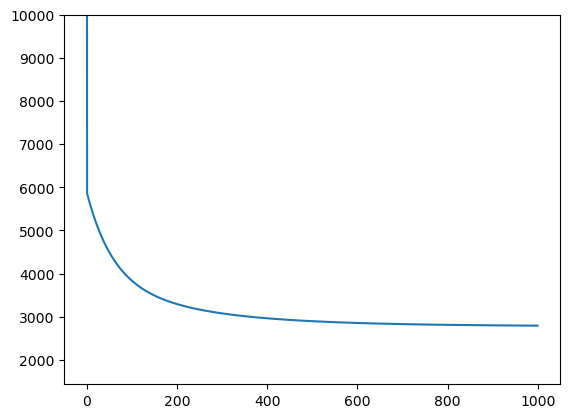

In [36]:
plt.plot(range(len(model.loss_list)),model.loss_list)
# plt.xlim([1000,2000])
plt.ylim(top = 10000)

## Effect of Learning rate on convergence of loss function

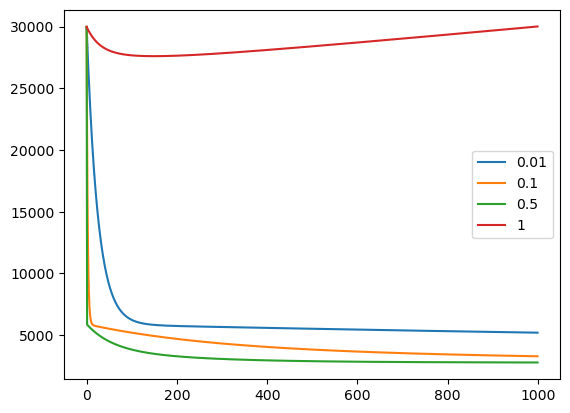

In [37]:
for l in [0.01,.1,.5,1]:
    model = MyBatchGD(rate = l,epochs = 1000)
    model.fit(X_train,y_train)
    
    plt.plot(range(len(model.loss_list)),model.loss_list,label = l)
    
plt.legend()    